# Exercise 1 Implementation

Training

In [1]:
# Imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import time
from memory_profiler import memory_usage

# Load the source file with the face data
mat_content = sio.loadmat('face.mat')

In [2]:
# Store face data and classification
face_data = mat_content['X']
face_label = mat_content['l']

# Append the matching data and labels into array 'faces': labels are not needed for PCA training (unsupervised learning)
# but we need it for assessing our algorithms during testing
faces = np.append(face_data, face_label, axis=0)
print(faces, faces.shape)

# Transpose in preparation for division into training and testing material
faces_transposed = faces.T
print (faces_transposed, faces_transposed.shape)

[[106 130 191 ...  70 183  77]
 [103 129 185 ...  62 250  72]
 [103 130 174 ...  83 163  68]
 ...
 [ 36  36  19 ...  89  95 103]
 [ 41  35  17 ...  94 106 110]
 [  1   1   1 ...  52  52  52]] (2577, 520)
[[106 103 103 ...  36  41   1]
 [130 129 130 ...  36  35   1]
 [191 185 174 ...  19  17   1]
 ...
 [ 70  62  83 ...  89  94  52]
 [183 250 163 ...  95 106  52]
 [ 77  72  68 ... 103 110  52]] (520, 2577)


[[142 134 138 ...  74  69  31]
 [ 83  70  51 ...  42  43   6]
 [ 90 117 124 ...  15  26  10]
 ...
 [104 100 103 ... 109 100  42]
 [184 193 200 ...  42  34  18]
 [ 51  76  74 ...  26  25   2]] (416, 2577)
[[ 90  92  93 ...  54  47   5]
 [ 98  99  98 ...  54  55  34]
 [166 111  74 ...  37  31  36]
 ...
 [116 123 146 ...  66  62  22]
 [ 77  72  68 ... 103 110  52]
 [108 108 110 ...  79  86  23]] (104, 2577)


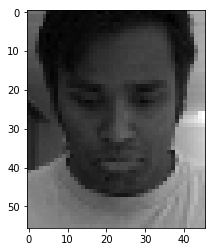

In [3]:
# Divide the data set into training and testing sets: 80% is training, 20% is testing

np.random.shuffle(faces_transposed) # Shuffle the rows (This is why we transposed)
training, test = faces_transposed[:416,:], faces_transposed[416:,:]
print (training, training.shape)
print (test, test.shape)

plt.imshow(np.reshape(training[100, :2576], (46,56)).T, cmap = 'gist_gray') # print 100th image of the training set as a sanity check to make sure we have shuffled along the right dimension of the array

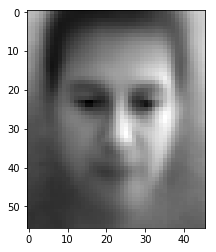

In [4]:
# Now let's start training our image recognition PCA algorithm
# We have face images that are CENTERED and they are of the SAME SIZE (needed for PCA)
# They are normalised for SCALE, ORIENTATION and TRANSLATION

# First, we only need the training and testing set without the labels
# Images are represented as rows
pca_train = training [:, :2576]
pca_test = test [:, :2576]

# Let's compute the mean face image
avg_face = np.mean(pca_train, axis=0)
plt.imshow(np.reshape(avg_face, (46,56)).T, cmap = 'gist_gray')

[[2800.90622689 2631.70450028 2374.61090052 ... -555.3527182
  -614.74713388 -639.16216716]
 [2631.70450028 2847.30699311 2660.97593842 ... -566.54451738
  -629.03111132 -656.75730399]
 [2374.61090052 2660.97593842 2774.38008506 ... -578.17011834
  -628.28051036 -651.94600592]
 ...
 [-555.3527182  -566.54451738 -578.17011834 ... 2898.54918639
  2726.08080621 2620.44212278]
 [-614.74713388 -629.03111132 -628.28051036 ... 2726.08080621
  2940.7022929  2851.93324704]
 [-639.16216716 -656.75730399 -651.94600592 ... 2620.44212278
  2851.93324704 2983.39386095]] (2576, 2576)


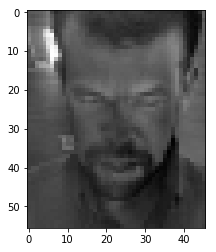

In [5]:
# Now let's subtract the mean face image from all of our training face images
pca_train_norm = pca_train-avg_face # works because of broadcasting
plt.imshow(np.reshape(pca_train_norm[0, :], (46,56)).T, cmap = 'gist_gray') 
# Show the first normalised face image and notice that it is distorted

# Computing the covariance matrix
cov = (np.dot(pca_train_norm.T, pca_train_norm))/416
print (cov, cov.shape)

In [6]:
# Computing the eigenvalues and eigenvectors of the covariance matrix directly and measuring how long it takes

start = time.time()
eigvals, eigvecs = np.linalg.eig(cov) # these are not ordered, so we order them according to the eigenvalues
end = time.time()
print (end-start) # Execution time in seconds

print (eigvals, eigvals.shape)
print (eigvecs, eigvecs.shape)

14.305622100830078
[ 9.14456916e+05+0.j  5.36265714e+05+0.j  4.50017283e+05+0.j ...
 -1.52567044e-13+0.j  3.62816364e-14+0.j  1.30377600e-13+0.j] (2576,)
[[-1.48282260e-02+0.j  1.65598092e-02+0.j  1.67141800e-02+0.j ...
  -1.10111859e-04+0.j -1.87518919e-03+0.j  3.41930758e-03+0.j]
 [-1.57563030e-02+0.j  1.66483188e-02+0.j  1.84041885e-02+0.j ...
  -1.02606428e-04+0.j -4.77295429e-05+0.j  3.43688948e-04+0.j]
 [-1.63172347e-02+0.j  1.62784197e-02+0.j  2.09063989e-02+0.j ...
   4.08957716e-04+0.j -3.85066777e-04+0.j  7.68105643e-04+0.j]
 ...
 [ 3.86391918e-03+0.j -5.06790917e-02+0.j -2.38687491e-03+0.j ...
   1.12861281e-02+0.j  6.73533922e-03+0.j -1.00486547e-02+0.j]
 [ 3.44347274e-03+0.j -5.01955444e-02+0.j -2.51730209e-03+0.j ...
  -2.18594776e-02+0.j -1.90508351e-02+0.j  2.12237508e-02+0.j]
 [ 3.69313504e-03+0.j -5.09963442e-02+0.j -4.02642344e-03+0.j ...
   2.08872995e-03+0.j  1.94230462e-03+0.j -9.94275043e-03+0.j]] (2576, 2576)


In [7]:
# Proving that the eigenvalues and eigenvectors make sense

eig_test_1 = np.dot(cov, eigvecs[:, 0])
eig_test_2 = eigvecs[:, 0]*eigvals[0]

print (eig_test_1-eig_test_2, (eig_test_1-eig_test_2).shape) # The values are basically zero, so the eigenvalue computation is correct

[ 1.65528036e-10+0.j  4.91127139e-11+0.j -1.18234311e-10+0.j ...
 -1.13686838e-11+0.j -1.68256520e-11+0.j  1.81898940e-12+0.j] (2576,)


In [8]:
# Taking the real part of the eigenvalues (complex eigenvalues are the result of calculation rounding errors, because the covariance matrix is symmetric)

eigvals = np.real(eigvals)
print (eigvals, eigvals.shape)
eigvecs = np.real(eigvecs)
print (eigvecs, eigvecs.shape)

[ 9.14456916e+05  5.36265714e+05  4.50017283e+05 ... -1.52567044e-13
  3.62816364e-14  1.30377600e-13] (2576,)
[[-1.48282260e-02  1.65598092e-02  1.67141800e-02 ... -1.10111859e-04
  -1.87518919e-03  3.41930758e-03]
 [-1.57563030e-02  1.66483188e-02  1.84041885e-02 ... -1.02606428e-04
  -4.77295429e-05  3.43688948e-04]
 [-1.63172347e-02  1.62784197e-02  2.09063989e-02 ...  4.08957716e-04
  -3.85066777e-04  7.68105643e-04]
 ...
 [ 3.86391918e-03 -5.06790917e-02 -2.38687491e-03 ...  1.12861281e-02
   6.73533922e-03 -1.00486547e-02]
 [ 3.44347274e-03 -5.01955444e-02 -2.51730209e-03 ... -2.18594776e-02
  -1.90508351e-02  2.12237508e-02]
 [ 3.69313504e-03 -5.09963442e-02 -4.02642344e-03 ...  2.08872995e-03
   1.94230462e-03 -9.94275043e-03]] (2576, 2576)


In [9]:
# Order eigenvalues and eigenvectors according to the size of the eigenvalues

eigvals = np.abs(eigvals)
index = eigvals.argsort()[::-1] # argsort returns the indices that would sort an array (in this case the vector eigvals)
eigvals = eigvals[index]
eigvecs = eigvecs[:,index]
print (index, index.shape)
print (eigvals, eigvals.shape)

# How many zero eigenvalues do we have?

print (np.linalg.matrix_rank(cov)) # We should have 2576 - 415 = 2161 zero eigenvalues
print ((eigvals == np.zeros(eigvals.shape)).sum()) # The rounding errors will give 0 eigenvalues that are precisely zero
print ((eigvals >= np.ones(eigvals.shape)/100000).sum()) # However there are 415 eigenvalues that are larger than 1e-05, which can be considered zero eigenvectors.
print (eigvals.max()) # The largest eigenvalue
print (eigvals[414])
print (eigvals[415])

[   0    1    2 ... 2489 1735 1734] (2576,)
[9.14456916e+05 5.36265714e+05 4.50017283e+05 ... 6.24230487e-15
 2.07411346e-15 2.07411346e-15] (2576,)
415
0
415
914456.9163755546
83.15603626726153
4.8148097560437797e-11


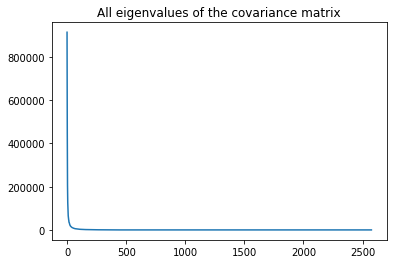

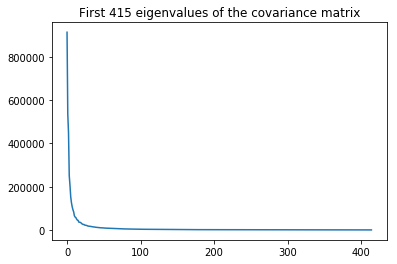

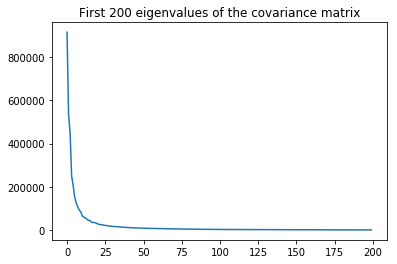

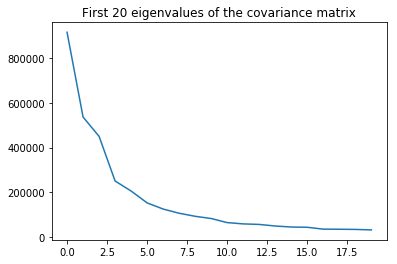

<Figure size 432x288 with 0 Axes>

In [10]:
# Let's visualise the eigenvalues

x = np.arange(0, 2576)

# All of them
plt.plot(x, eigvals) # Clearly out of scale
plt.title('All eigenvalues of the covariance matrix')
plt.figure()

# First 415 of them
plt.plot(x[:415], eigvals[:415]) # Still out of scale
plt.title('First 415 eigenvalues of the covariance matrix')
plt.figure()

# First 200 of them
plt.plot(x[:200], eigvals[:200])
plt.title('First 200 eigenvalues of the covariance matrix')
plt.figure()

# First 20 of them
plt.plot(x[:20], eigvals[:20])
plt.title('First 20 eigenvalues of the covariance matrix')
plt.figure()

plt.show()

In [11]:
# We keep the largest n eigenvalues and theeir corresponding eigenvectors n<=415, the other eigenvalues are zero

n = 400
eigvecs_best = eigvecs[:, :n]
eigvals_best = eigvals[:n]

# Projecting each training data point to the space spanned by the eigenvectors
proj_pca_train_norm = np.zeros((416, n))
for i in range(416):
    proj_pca_train_norm [i, :] = np.dot(pca_train_norm[i, :], eigvecs_best)
    
print (proj_pca_train_norm, proj_pca_train_norm.shape)

# Now in array proj_pca_train_norm, in each row, we have the projected coordinates for each face image

[[-1.85240161e+02  4.42441408e+02  3.63007736e+02 ...  5.00692296e+00
   1.86134025e+01  3.27988749e+00]
 [ 6.42376475e+02 -3.21963269e+02 -9.30484595e+02 ... -8.10863032e+00
   1.15452474e+01 -3.89415244e+00]
 [-1.51039676e+02  1.17733176e+02  9.10989569e+02 ...  1.81052936e+00
   9.60087340e+00  1.14875605e+01]
 ...
 [-2.76492185e+02 -5.65643719e+02  1.12068327e+03 ... -1.74435107e+00
  -6.57922039e+00 -8.48761633e+00]
 [-1.18369779e+03  6.07233659e+02  4.88343624e+02 ... -7.09366478e+00
   1.63633699e+01  5.86980565e+00]
 [-2.56532086e+02  1.61612000e+02 -7.74078887e+02 ...  1.00800922e+00
  -7.70548180e+00  2.82069466e+00]] (416, 400)


In [12]:
# Let's try to compute the eigenvalues using the low-dimensional method

# First we need to compute the new covariance matrix (1/N)A^T*A
cov_ld = np.dot(pca_train_norm, pca_train_norm.T)/416
print (cov_ld, cov_ld.shape) # as we can see it is NxN (and not DxD as the covariance matrix we had before)

[[ 6329.41216395 -1420.72468193  -152.99383757 ...   833.46014842
   1550.88642662   -67.79247501]
 [-1420.72468193 10672.3884722   -285.70279884 ...  -711.31131284
  -6109.6326308   3096.42644834]
 [ -152.99383757  -285.70279884 10810.37419936 ...  3057.65751228
   -490.2743826   1233.57075423]
 ...
 [  833.46014842  -711.31131284  3057.65751228 ... 12803.89515212
   -675.57280045 -3828.84785593]
 [ 1550.88642662 -6109.6326308   -490.2743826  ...  -675.57280045
  13429.00492005 -2101.73888542]
 [  -67.79247501  3096.42644834  1233.57075423 ... -3828.84785593
  -2101.73888542  9271.76730911]] (416, 416)


In [13]:
# Now we compute the eigenvalues and eigenvectors of the new covariance matrix and measure the elapsed time

start_ld = time.time()
eigvals_ld, eigvecs_ld = np.linalg.eig(cov_ld) # these are not ordered, so we order them and the corresponding eigenvalues
end_ld = time.time()
print (end_ld-start_ld)
print (end-start)

# Taking the real part of the eigenvalues (complex eigenvalues are the result of calculation rounding errors, because the covariance matrix is symmetric)

eigvals_ld = np.real(eigvals_ld)
eigvecs_ld = np.real(eigvecs_ld)

# Order eigenvalues and eigenvectors according to the size of the eigenvalues

eigvals_ld = np.abs(eigvals_ld)
index_ld = eigvals_ld.argsort()[::-1] # argsort returns the indices that would sort an array (in this case the vector eigvals)
eigvals_ld = eigvals_ld[index_ld]
eigvecs_ld = eigvecs_ld[:,index_ld]
print (eigvals_ld, eigvals_ld.shape)

0.11985087394714355
14.305622100830078
[9.14456916e+05 5.36265714e+05 4.50017283e+05 2.50954771e+05
 2.06166093e+05 1.53229160e+05 1.25820588e+05 1.07051846e+05
 9.34669190e+04 8.35364247e+04 6.53216054e+04 5.95679534e+04
 5.71804211e+04 5.01401222e+04 4.56275509e+04 4.44320358e+04
 3.61483229e+04 3.57199470e+04 3.49313126e+04 3.27199358e+04
 2.90171747e+04 2.67076850e+04 2.54468035e+04 2.51119561e+04
 2.24879798e+04 2.17514661e+04 2.13217909e+04 2.04310629e+04
 1.84491296e+04 1.75979568e+04 1.70436590e+04 1.69475996e+04
 1.62262050e+04 1.55960860e+04 1.50355964e+04 1.43210537e+04
 1.38444083e+04 1.36397911e+04 1.28738319e+04 1.24059805e+04
 1.19817509e+04 1.15027753e+04 1.12149412e+04 1.07900181e+04
 1.04789972e+04 1.03102335e+04 9.81058667e+03 9.79238200e+03
 9.56523142e+03 9.49014428e+03 9.01370553e+03 8.90955950e+03
 8.45321657e+03 8.29495564e+03 8.03437136e+03 7.86248938e+03
 7.68812440e+03 7.57985362e+03 7.39859962e+03 7.28899900e+03
 7.00901973e+03 6.71483574e+03 6.62323190e+03 

415
0
415
914456.9163755537
83.15603626726802
1.234632790422949e-11


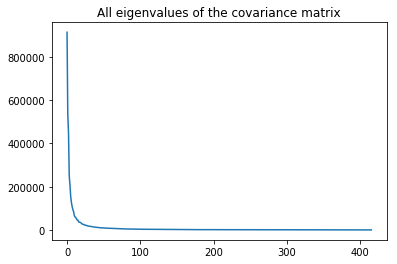

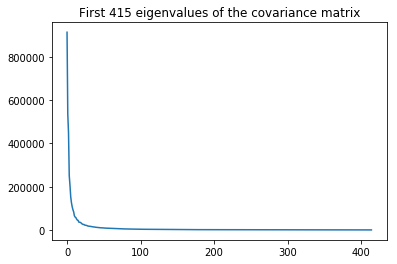

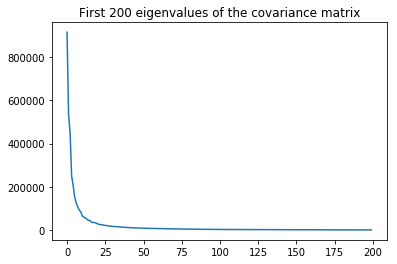

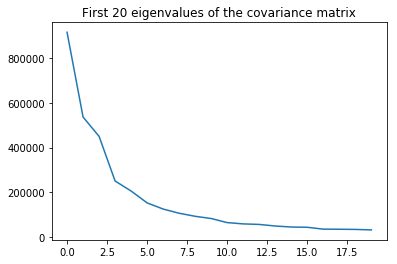

<Figure size 432x288 with 0 Axes>

In [14]:
# How many zero eigenvalues do we have this time?

print (np.linalg.matrix_rank(cov_ld)) # We should have 2576 - 415 = 2161 zero eigenvalues
print ((eigvals_ld == np.zeros(eigvals_ld.shape)).sum()) # The rounding errors will give 0 eigenvalues that are precisely zero
print ((eigvals_ld >= np.ones(eigvals_ld.shape)/100000).sum()) # However there are 415 eigenvalues that are larger than 1e-05, which can be considered zero eigenvectors.
print (eigvals_ld.max()) # The largest eigenvalue
print (eigvals_ld[414])
print (eigvals_ld[415])

# Let's visualise the eigenvalues

x = np.arange(0, 416)

# All of them
plt.plot(x, eigvals_ld) # Clearly out of scale
plt.title('All eigenvalues of the covariance matrix')
plt.figure()

# First 415 of them
plt.plot(x[:415], eigvals_ld[:415]) # Still out of scale
plt.title('First 415 eigenvalues of the covariance matrix')
plt.figure()

# First 200 of them
plt.plot(x[:200], eigvals_ld[:200])
plt.title('First 200 eigenvalues of the covariance matrix')
plt.figure()

# First 20 of them
plt.plot(x[:20], eigvals_ld[:20])
plt.title('First 20 eigenvalues of the covariance matrix')
plt.figure()

plt.show()

In [21]:
# What is the relationship between the eigenvalues and the eigenvectors resulting from the two methods

print (eigvals[:416]-eigvals_ld, (eigvals[:416]-eigvals_ld).shape)
# Therefore the eigenvalues are identical

print(eigvecs_ld, eigvecs_ld.shape)
print ((pca_train_norm.T).shape)
eigvecs_ld_cmp = np.dot(pca_train_norm.T, eigvecs_ld)
print (eigvecs_ld_cmp, eigvecs_ld_cmp.shape)
print (eigvecs[:, :416], eigvecs[:, :416].shape)
print (eigvecs[:, :416]-eigvecs_ld_cmp/np.linalg.norm(eigvecs_ld_cmp,axis=0))

[ 9.31322575e-10 -1.16415322e-10 -1.74622983e-10 -6.69388101e-10
 -2.32830644e-10  6.98491931e-10 -1.60071068e-10 -4.36557457e-10
 -2.91038305e-10 -3.63797881e-10  1.01863407e-10 -3.63797881e-11
  1.45519152e-11  1.74622983e-10  2.61934474e-10 -3.63797881e-11
 -5.09317033e-11  1.74622983e-10  7.27595761e-12  1.56433089e-10
  3.63797881e-11  1.63709046e-10  4.72937245e-11  2.91038305e-11
  3.01952241e-10 -6.18456397e-11 -6.18456397e-11 -4.72937245e-11
  9.82254278e-11 -2.54658516e-11 -1.05501385e-10 -6.54836185e-11
  7.09405867e-11 -5.45696821e-11 -1.81898940e-11  4.00177669e-11
 -7.27595761e-12  1.20053301e-10  2.54658516e-11 -5.09317033e-11
 -3.63797881e-11  3.63797881e-12  7.27595761e-12 -3.09228199e-11
  1.63709046e-11  1.63709046e-11  5.63886715e-11  2.36468622e-11
  5.45696821e-12  3.63797881e-12  3.63797881e-11 -3.63797881e-12
  4.91127139e-11  3.63797881e-12  1.90993887e-11  4.36557457e-11
  8.18545232e-12  1.09139364e-11 -3.45607987e-11 -4.91127139e-11
  1.81898940e-12  1.18234

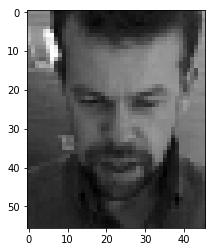

In [16]:
# Let's try to reconstruct one face image, just as a sanity check to see if we can still see a face (worse quality of course, because we did a lossy transformation on it)
face_check = avg_face + np.dot(eigvecs_best, proj_pca_train_norm[0, :])
plt.imshow(np.reshape(face_check, (46,56)).T, cmap = 'gist_gray')

Testing

In [17]:
# Now that we've trained our model, let's test it on our testing data set
# First, let's normalise the testing set (subtract the average face from all face images)

pca_test_norm = pca_test-avg_face # Works because of broadcasting
print (pca_test_norm, pca_test_norm.shape)

# Then let's project each testing image to the eigenspace (space spanned by the best eigenvectors)
proj_pca_test_norm = np.zeros((104, n))
for i in range(104):
    proj_pca_test_norm [i, :] = np.dot(pca_test_norm[i, :], eigvecs_best)

print (proj_pca_test_norm, proj_pca_test_norm.shape)

# Now in array proj_pca_test_norm, in each row, we have the projected coordinates for each face image

[[-33.75480769 -32.08894231 -28.43269231 ... -42.36538462 -30.40384615
  -35.73076923]
 [-25.75480769 -25.08894231 -23.43269231 ... -31.36538462 -30.40384615
  -27.73076923]
 [ 42.24519231 -13.08894231 -47.43269231 ... -42.36538462 -47.40384615
  -51.73076923]
 ...
 [ -7.75480769  -1.08894231  24.56730769 ... -16.36538462 -18.40384615
  -20.73076923]
 [-46.75480769 -52.08894231 -53.43269231 ...   6.63461538  18.59615385
   27.26923077]
 [-15.75480769 -16.08894231 -11.43269231 ...  -6.36538462  -5.40384615
    3.26923077]] (104, 2576)
[[-6.56170982e+02  6.78032535e+02 -2.91063815e+02 ...  8.82522751e-01
  -2.38332549e+01  1.67055658e+01]
 [-2.27729746e+03 -5.66774616e+01 -1.36068238e+03 ...  7.68784792e+00
  -2.43225952e+00 -3.06833567e+01]
 [-1.12775099e+03 -1.31721985e+01  1.07379462e+03 ... -3.82170341e+00
   7.00477297e+00 -2.43264447e+01]
 ...
 [ 1.18950778e+03  2.12644258e+02  4.95763217e+02 ... -1.83861821e+01
  -2.58066909e+00  1.69811132e+01]
 [ 4.07148075e+02 -2.70488296e+02 -

[2247.90252839 3120.83817164 2913.81845195 2558.5446256  3321.83291124
 3282.25495062 3306.31921775 2731.45598763 2327.89926083 3052.77706931
 2010.35544738 2480.16606097 3877.88669971 2875.14800681 2093.06315966
 2613.44323107 2571.7041125  2577.26427085 1924.49387843 2525.62948414
 3076.84034095 2427.2740627  2840.55414177 2388.42042085 2729.6737196
 2677.61580372 2304.63447428 2424.81774789 2973.2519393  2345.74921856
 2947.13342331 2739.63232743 2415.43963922 2962.02844987 3049.49696877
 2416.46954911 3252.4916316  2687.55315851 3461.21809997 2610.1012725
 2782.15823396 3121.83972524 3022.02787453 2425.16761208 2666.73845582
 3628.77632577 2709.33108263 2259.59965194 2831.81231085 2495.22065672
 2882.94554996 2876.20136125 2525.74079936 2833.69835537 1972.32604984
 1754.99727417 2535.33661022 2407.27745995 2312.11897103 2552.96887297
 2666.01103968 2358.39708279 2953.2814457  2623.75480794 2397.30276527
 2860.91218823 2824.61110385 2791.14868128 2551.52337485 3031.12145138
 1648.62

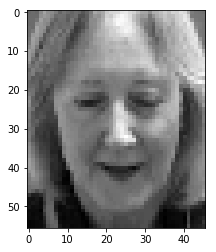

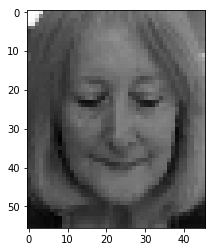

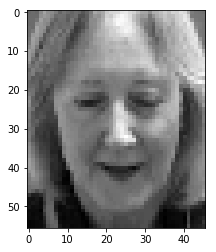

In [18]:
# Let's classify the first image
plt.imshow(np.reshape(pca_test[0, :], (46,56)).T, cmap = 'gist_gray')
plt.figure()

distances = np.zeros(416)

for i in range(416):
    distances[i] = np.linalg.norm(proj_pca_train_norm[i, :]-proj_pca_test_norm[0, :])
    
print (distances, distances.shape)

smallest_distance = distances.min()
smallest_index = distances.argmin()
print (smallest_distance, smallest_index)

# Which identity does it belong to according to the learning set?
print (training[smallest_index, 2576])
# Which identity does it actually belong to?
print (test[0, 2576])

# Print the picture that our picture is the closest to
plt.imshow(np.reshape(pca_train[smallest_index, :], (46,56)).T, cmap = 'gist_gray')
plt.figure()

# Print our actual image
plt.imshow(np.reshape(pca_test[0, :], (46,56)).T, cmap = 'gist_gray')

In [19]:
# Now let's do this for all of the testing images

distances = np.zeros((416, 104)) # In each row we store the distances (1 column = 1 testing image's distances)

for k in range (104):
    for i in range(416):
        distances[i, k] = np.linalg.norm(proj_pca_train_norm[i, :]-proj_pca_test_norm[k, :])
        
# Now we have in each column the distances of the testing images from each of the training images.
# Next step is to find the minimum of each column, and the corresponding row index (per column)
print (distances, distances.shape)

smallest_distance = distances.min(axis=0) # min per columns
smallest_index = distances.argmin(axis=0)
print (smallest_distance, smallest_distance.shape)
print (smallest_index, smallest_index.shape)

# Get the smallest distance image's label
#detected_label = np.zeros (104)
#for j in range(104):
#    detected_label[j] = training[smallest_index[j], 2576]
#print (detected_label, detected_label.shape)

actual_label = test [:, 2576].T

print (actual_label, actual_label.shape)


# Which identity does it belong to according to the learning set?
print (training[smallest_index, 2576], training[smallest_index, 2576].shape)

same = (training[smallest_index, 2576]==actual_label)

print (same, same.shape)

percentage = np.sum(same)/104

print (percentage)


[[2247.90252839 3339.72091689 2482.92285368 ... 2747.94200189
  2122.93862935 2470.66005266]
 [3120.83817164 3788.61253561 3421.83717868 ... 2869.90442228
  2087.8854441  2453.52854123]
 [2913.81845195 3863.68519883 2295.22524342 ... 2686.57050247
  2712.04062233 2990.26493714]
 ...
 [3270.83464033 3965.34251092 2637.9318764  ... 2803.67288229
  3046.58701004 2834.8635018 ]
 [2368.60385805 3277.36348495 2905.17494995 ... 3198.78616214
  3307.15888068 2959.94217807]
 [2493.20793377 3252.69713148 2748.37979013 ... 3182.21034004
  1983.07660562 2455.72631477]] (416, 104)
[1462.39171133 1944.44944058 1836.20557988 1604.91362182 1393.61795318
 1599.93223146 1961.90543745 1325.14814614  814.67658505  865.1076686
 1942.88664953 1995.52132382 1827.49270402 1309.49651393 2253.27113884
 1569.22567242 1879.77444904 1559.71370225 1557.40572576 1985.52782306
 1479.39654529 1359.83649699 1337.39850409 1120.69105434  993.46726937
 1572.20071262  940.73833218 1570.97240119 1944.41692379 2117.08791151


In [20]:
def highdimension():
    eigvals_hd, eigvecs_hd = np.linalg.eig(cov)
    return

#def lowdimension():
#    eigvals2_ld, eigvecs2_ld = np.linalg.eig(cov2)
#    return

def donothing():
    x=1123
    return

#mem_low = max(memory_usage(proc=lowdimension))
mem_high = max(memory_usage(proc=highdimension))
mem_nothing = max(memory_usage(proc=donothing))

#print("Maximum memory used by low dimension way: {0} MiB".format(str(mem_low)))
print("Maximum memory used by high dimension way: {0} MiB".format(str(mem_high)))
print("Maximum memory used by donothing: {0} MiB".format(str(mem_nothing)))

# Check it tomorrow, strange that the memory usage of donothing and lowdimension if the same, but don't know why yet

Maximum memory used by high dimension way: 625.9609375 MiB
Maximum memory used by donothing: 419.203125 MiB
